In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
generate_built = False

In [3]:
!pip install xarray[complete]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [4]:
# INSTALLING REQUIRED LIBRARIES
!pip install -U pyproj -q
!pip install -U utm -q
!pip install -U google-colab -q
!pip install -U tornado -q
!pip install geemap -q
!pip install wxee

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.8/436.8 kB 11.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado==6.3.3, but you have tornado 6.4.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00


In [5]:
!pip install rioxarray
import xarray as xr
import rioxarray as rxr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# !earthengine authenticate
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

In [7]:
import ee
import wxee
#wxee.Initialize()

In [8]:
lat_diff = 0
lon_diff = 0
aoi = ee.Geometry.Polygon(
        [[[-125, 32],
          [-113, 32],
          [-113, 42],
          [-125, 42]]])

In [9]:
!ls drive/MyDrive/long_ndui/

 albuquerque		'Copy of best_model_swinir.pth'   la			    minneapolis
 austin			 denver				  Las_Vegas		    portland
 best_model_swinir.pth	 ds_dmsp_1992_2023_austin.nc	  long_dmsp_11_cities.csv   seattle
 best_weight		 ds_dmsp_1992_2023_LasVegas.nc	  long_dmsp_9_cities.csv    washington_DC
 columbus		 kansas_city			  louisville


In [10]:
df = pd.read_csv('/content/drive/MyDrive/long_ndui//long_dmsp_9_cities.csv')
print(df)

            Name      lat       lon
0    albuquerque  35.0844 -106.6504
1         austin  30.2672  -97.7431
2       columbus  39.9612  -82.9988
3    kansas_city  39.0997  -94.5786
4      Las_Vegas  36.1716 -115.1391
5    minneapolis  44.9778  -93.2650
6       portland  45.5152 -122.6784
7        seattle  47.6061 -122.3328
8  washington_DC  38.9072  -77.0369


In [11]:
city_name=[]
for i in range(len(df.Name)):
  city = str(df.Name[i])
  city_name.append(city)
city_name

['albuquerque',
 'austin',
 'columbus',
 'kansas_city',
 'Las_Vegas',
 'minneapolis',
 'portland',
 'seattle',
 'washington_DC']

In [12]:
du=[]
du_=[]
for i in range(len(df.Name)):
    du1 = xr.open_dataset('/content/drive/MyDrive/long_ndui/'+city_name[i]+'/ndui_'+city_name[i]+'_1999_2022.nc')
    du2 = du1.rename({'ndui':'ndui_'+str(city_name[i])}).mean(['lat', 'lon'])
    du.append(du2)
    du_.append(du1.load())

In [13]:
print(du1.lon.max().values, du1.lon.min().values)
print(du1.lat.max().values, du1.lat.min().values)

-76.78695742395996 -77.28686987957248
39.157428487477326 38.657246537279576


In [14]:
import ee  # Importing Earth Engine


# Dictionary to hold each city's AOI
city_aoi = {}
for i in range(len(df.Name)):
    # Coordinates from du1
    lon_max = du_[i].lon.max().item()
    lon_min = du_[i].lon.min().item()
    lat_max = du_[i].lat.max().item()
    lat_min = du_[i].lat.min().item()

    # Define the AOI using these coordinates
    aoi = ee.Geometry.Polygon([
        [
            [lon_min, lat_min],  # Bottom-left corner
            [lon_max, lat_min],  # Bottom-right corner
            [lon_max, lat_max],  # Top-right corner
            [lon_min, lat_max],  # Top-left corner
        ]
    ])

    city_aoi[str(df.Name[i])] = aoi

# Example to print the AOI of a city
for city_name, aoi in city_aoi.items():
    print(f"{city_name} AOI: {aoi.getInfo()}")

albuquerque AOI: {'type': 'Polygon', 'coordinates': [[[-106.85042587994593, 34.88432234397759], [-106.45049591545592, 34.88432234397759], [-106.45049591545592, 35.28452180305283], [-106.85042587994593, 35.28452180305283], [-106.85042587994593, 34.88432234397759]]]}
austin AOI: {'type': 'Polygon', 'coordinates': [[[-97.99321684158427, 30.01725013461802], [-97.49303489138651, 30.01725013461802], [-97.49303489138651, 30.51743208481577], [-97.99321684158427, 30.51743208481577], [-97.99321684158427, 30.01725013461802]]]}
columbus AOI: {'type': 'Polygon', 'coordinates': [[[-83.24889858874533, 39.71123986013701], [-82.74871663854758, 39.71123986013701], [-82.74871663854758, 40.21142181033476], [-83.24889858874533, 40.21142181033476], [-83.24889858874533, 39.71123986013701]]]}
kansas_city AOI: {'type': 'Polygon', 'coordinates': [[[-94.8285419271596, 38.84966567113798], [-94.32862947154709, 38.84966567113798], [-94.32862947154709, 39.349847621335726], [-94.8285419271596, 39.349847621335726], [-

In [15]:
if generate_built:
    start_date = '2023-01-01'
    end_date = '2023-12-31'
    dataset = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1') \
                .filterDate(start_date, end_date).select('built').mean()
    dataset = dataset.set('system:time_start', 0)
    ds_built = dataset.wx.to_xarray(region=city_aoi['austin'].bounds(), scale=30)

In [16]:
ds_built_ = []
for city_name, aoi in city_aoi.items():
    if generate_built:
        print(f"{city_name} AOI: {aoi.getInfo()}")
        ds_built = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)
        ds_built.to_netcdf('/content/drive/MyDrive/earth_engine/dynamic_world_built_'+str(city_name)+'.nc')
    else:
        ds_built = xr.open_dataset('/content/drive/MyDrive/earth_engine/dynamic_world_built_'+str(city_name)+'.nc').load()
        ds_built = ds_built.rename({"x": "lon", "y": "lat"})
        ds_built_.append(ds_built)

In [17]:
ds_built_[0].interp(lat = du_[0].lat.values, lon = du_[0].lon.values, method='nearest')

<xarray.Dataset> Size: 18MB
Dimensions:      (time: 1, lat: 1486, lon: 1485)
Coordinates:
  * time         (time) datetime64[ns] 8B 1970-01-01
    spatial_ref  int32 4B 0
  * lat          (lat) float64 12kB 35.28 35.28 35.28 ... 34.88 34.88 34.88
  * lon          (lon) float64 12kB -106.9 -106.9 -106.8 ... -106.5 -106.5
Data variables:
    built        (time, lat, lon) float64 18MB 0.02838 0.02753 ... 0.03264
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

In [18]:
from tqdm import tqdm
for i,data in tqdm(enumerate(du_)):
    #print(data)
    ds_built_ndui = ds_built_[i].interp(lat = du_[i].lat.values, lon = du_[i].lon.values, method='nearest')
    du_[i]['built'] = (('lat', 'lon'), ds_built_ndui.built.values[0,:,:])
    du_[i]['built_mask'] = du_[i]['built'] > 0.2
    du_[i] = du_[i].chunk({'lat': 100, 'lon': 100})
    du_[i]['ndui_mask'] = du_[i]['ndui'] * du_[i]['built_mask']
    du_[i] = du_[i].load()

9it [00:08,  1.03it/s]


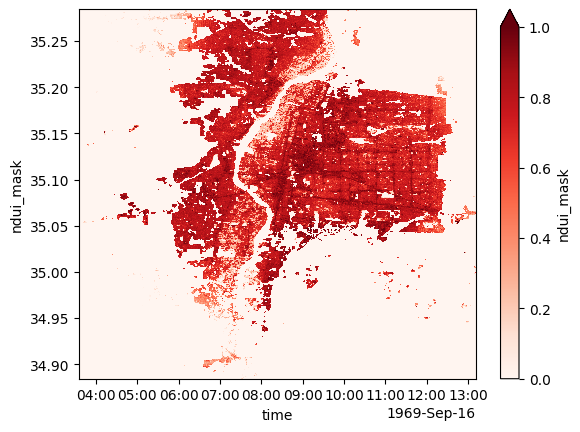

In [25]:
du_[0].ndui_mask.isel(time=23).plot(cmap='Reds', vmin=0.0, extend='max')
du_[0].ndui_mask.mean(dim='lat').mean(dim='lon').plot()

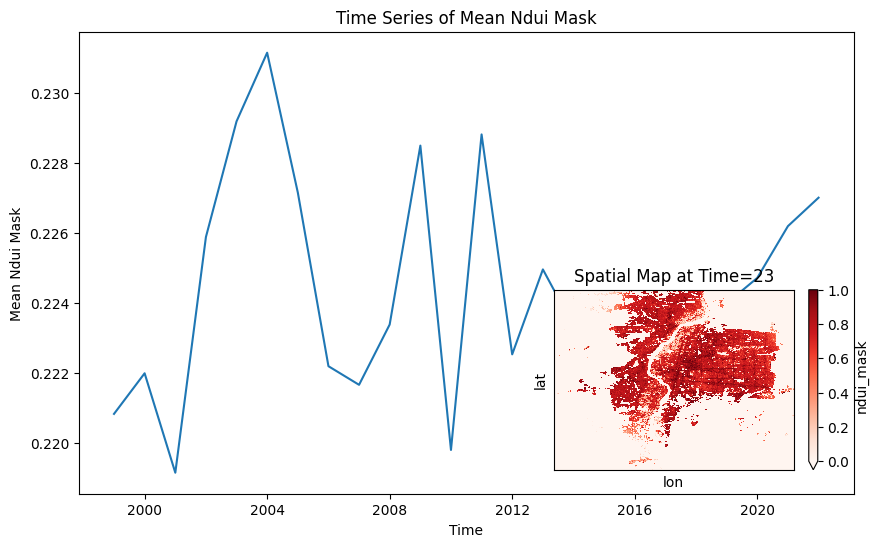

In [26]:
import matplotlib.pyplot as plt

# Set up the figure with a main axis for the time series
fig, ax_main = plt.subplots(figsize=(10, 6))

# Plot the time series (main plot)
du_[0].ndui_mask.mean(dim='lat').mean(dim='lon').plot(ax=ax_main)
ax_main.set_title('Time Series of Mean Ndui Mask')
ax_main.set_ylabel('Mean Ndui Mask')
ax_main.set_xlabel('Time')

# Create an inset axis for the spatial map
inset_ax = fig.add_axes([0.6, 0.15, 0.3, 0.3])  # Adjust the position and size as needed

# Plot the spatial map in the inset
du_[0].ndui_mask.isel(time=23).plot(ax=inset_ax, cmap='Reds', vmin=0.0)
inset_ax.set_title('Spatial Map at Time=23')
inset_ax.set_xticks([])
inset_ax.set_yticks([])

plt.show()

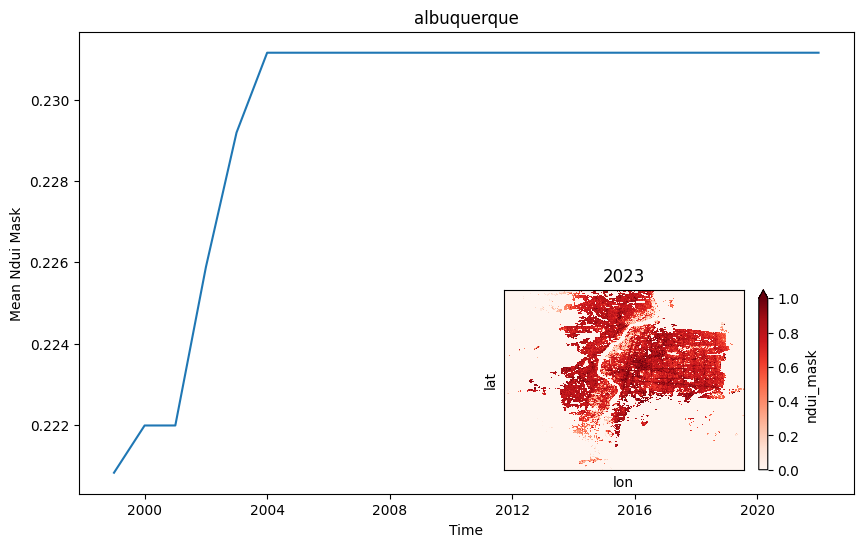

In [35]:
import matplotlib.pyplot as plt
import xarray as xr

# Step 1: Calculate the mean time series
time_series = du_[0].ndui_mask.mean(dim=['lat', 'lon'])

# Step 2: Ensure non-decreasing values by replacing any decrease with the previous value
non_decreasing_time_series = time_series.copy()
for t in range(1, len(non_decreasing_time_series)):
    if non_decreasing_time_series[t] < non_decreasing_time_series[t - 1]:
        non_decreasing_time_series[t] = non_decreasing_time_series[t - 1]

# Step 3: Plot the modified time series with an inset for the spatial map
fig, ax_main = plt.subplots(figsize=(10, 6))

# Plot the non-decreasing time series
non_decreasing_time_series.plot(ax=ax_main)
ax_main.set_title(df.Name[0])
ax_main.set_ylabel('Mean Ndui Mask')
ax_main.set_xlabel('Time')

# Create an inset axis for the spatial map
inset_ax = fig.add_axes([0.55, 0.15, 0.3, 0.3])  # Adjust the position and size as needed

# Plot the spatial map in the inset
du_[0].ndui_mask.isel(time=23).plot(ax=inset_ax, cmap='Reds', vmin=0.0, extend='max')
inset_ax.set_title('2023')
inset_ax.set_xticks([])
inset_ax.set_yticks([])

plt.show()

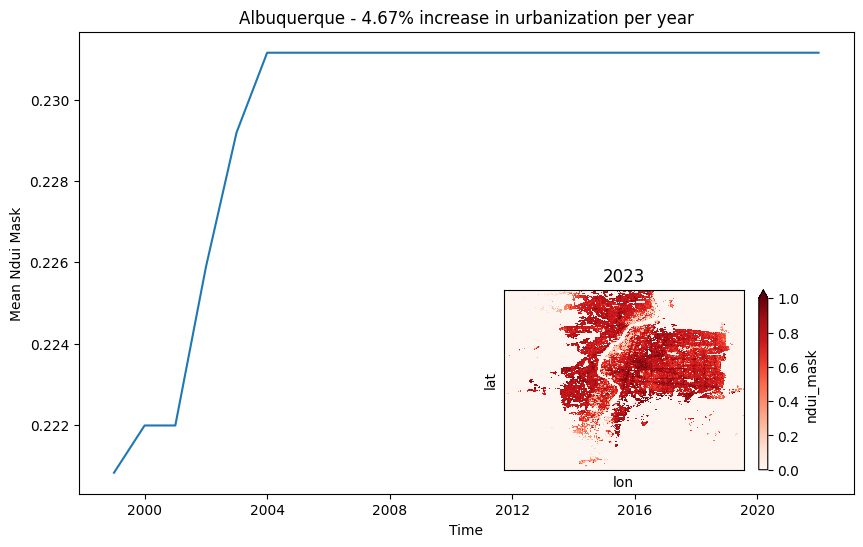

In [40]:
import matplotlib.pyplot as plt
import xarray as xr

# Step 1: Calculate the mean time series
time_series = du_[0].ndui_mask.mean(dim=['lat', 'lon'])

# Step 2: Ensure non-decreasing values by replacing any decrease with the previous value
non_decreasing_time_series = time_series.copy()
for t in range(1, len(non_decreasing_time_series)):
    if non_decreasing_time_series[t] < non_decreasing_time_series[t - 1]:
        non_decreasing_time_series[t] = non_decreasing_time_series[t - 1]

# Step 3: Calculate the overall percentage increase
initial_value = non_decreasing_time_series[0].item()  # Convert to scalar if necessary
final_value = non_decreasing_time_series[-1].item()
percentage_increase = ((final_value - initial_value) / initial_value) * 100

# Step 4: Plot the modified time series with an inset for the spatial map
fig, ax_main = plt.subplots(figsize=(10, 6))

# Plot the non-decreasing time series
non_decreasing_time_series.plot(ax=ax_main)

# Update title to include city name and percentage increase
# Update title to include city name with first letter capitalized and percentage increase per year
ax_main.set_title(f"{df.Name[0].capitalize()} - {percentage_increase:.2f}% increase in urbanization per year")

# ax_main.set_title(f"{df.Name[0]} - {percentage_increase:.2f}% Increase in Urbanization per year")
ax_main.set_ylabel('Mean Ndui Mask')
ax_main.set_xlabel('Time')

# Create an inset axis for the spatial map
inset_ax = fig.add_axes([0.55, 0.15, 0.3, 0.3])  # Adjust the position and size as needed

# Plot the spatial map in the inset
du_[0].ndui_mask.isel(time=23).plot(ax=inset_ax, cmap='Reds', vmin=0.0, extend='max')
inset_ax.set_title('2023')
inset_ax.set_xticks([])
inset_ax.set_yticks([])

plt.show()

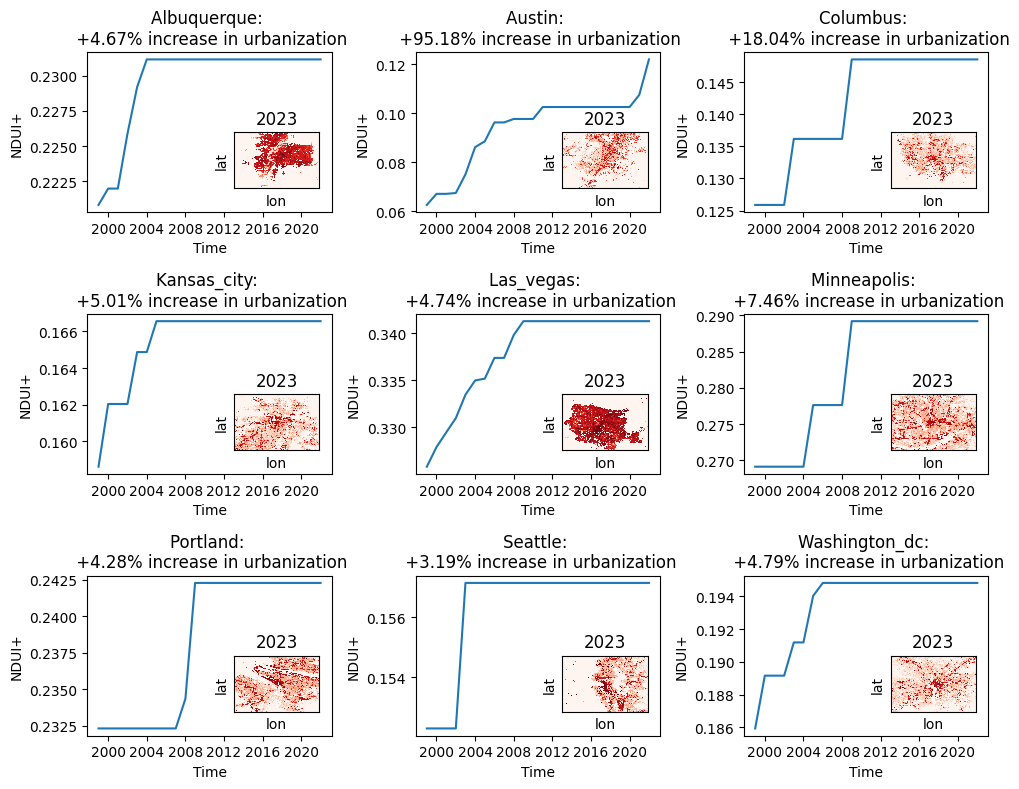

In [48]:
import matplotlib.pyplot as plt
import xarray as xr

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()  # Flatten for easier indexing in the loop

# Iterate through each of the 9 du_ elements and plot
for i in range(9):
    # Step 1: Calculate the mean time series
    time_series = du_[i].ndui_mask.mean(dim=['lat', 'lon'])

    # Step 2: Ensure non-decreasing values by replacing any decrease with the previous value
    non_decreasing_time_series = time_series.copy()
    for t in range(1, len(non_decreasing_time_series)):
        if non_decreasing_time_series[t] < non_decreasing_time_series[t - 1]:
            non_decreasing_time_series[t] = non_decreasing_time_series[t - 1]

    # Step 3: Calculate the overall percentage increase
    initial_value = non_decreasing_time_series[0].item()  # Convert to scalar if necessary
    final_value = non_decreasing_time_series[-1].item()
    percentage_increase = ((final_value - initial_value) / initial_value) * 100

    # Step 4: Plot the modified time series with an inset for the spatial map
    ax_main = axes[i]

    # Plot the non-decreasing time series in the current subplot axis
    non_decreasing_time_series.plot(ax=ax_main)

    # Update title to include city name with first letter capitalized and percentage increase per year
    city_name = df.Name[i].capitalize()
    ax_main.set_title(f"{city_name}: \n +{percentage_increase:.2f}% increase in urbanization")
    ax_main.set_ylabel('NDUI+')
    ax_main.set_xlabel('Time')

    # Create an inset axis for the spatial map
    inset_ax = ax_main.inset_axes([0.6, 0.15, 0.35, 0.35])  # Adjust the position and size as needed

    # Plot the spatial map in the inset
    du_[i].ndui_mask.isel(time=23).plot(ax=inset_ax, cmap='Reds', vmin=0.0, extend='max', add_colorbar=False)
    inset_ax.set_title('2023')
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.savefig('us_cities_time_series', dpi=500)